In [1]:
using DrWatson
quickactivate(@__DIR__)

using NetHeider
using LinearAlgebra
using LightGraphs
using Plots
using DataFrames
using JLD2
using Statistics

In [2]:
res = jldopen(datadir("sims_add_unbalanced2", "collected_results.jld2")) do file
    file["res"]
end
first(res, 10)

,inform_every,add_edges,m_filename,pr_neg,padd,measure_balance_every_step
,Float64?,#add_sin…?,String?,Float64?,Float64?,Int64?
1,0.25,add_single_edge2!,results.csv,0.05,0.01,5
2,0.25,add_single_edge2!,results.csv,0.0,0.01,5
3,0.25,add_single_edge2!,results.csv,0.15,0.01,5
4,0.25,add_single_edge2!,results.csv,0.1,0.01,5
5,0.25,add_single_edge2!,results.csv,0.25,0.01,5
6,0.25,add_single_edge2!,results.csv,0.2,0.01,5
7,0.25,add_single_edge2!,results.csv,0.3,0.01,5
8,0.25,add_single_edge2!,results.csv,0.05,0.01,5
9,0.25,add_single_edge2!,results.csv,0.0,0.01,5


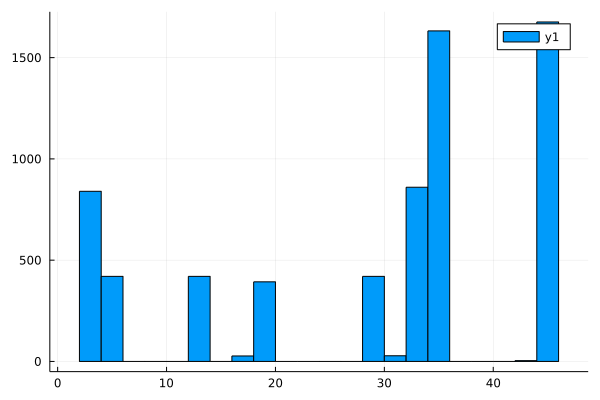

In [3]:
res.bal2bal_mean[100]
res.bu_mean[15][1,1,:]
sum(res.bu_mean[15][1,1,:])
# res.bal_unbal_table[1000][1,:,1,1]

histogram([sum(res.bu_mean[i][1,1,:]) for i in 1:nrow(res)])

In [4]:
res.bal2bal_mean[1]

80×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.95
 1.0
 1.0
 0.95
 ⋮
 0.9411764705882353
 0.9411764705882353
 0.9411764705882353
 0.9411764705882353
 0.9411764705882353
 0.9411764705882353
 0.9411764705882353
 1.0
 1.0

In [5]:
names(res)[1:end]

40-element Vector{String}:
 "inform_every"
 "add_edges"
 "m_filename"
 "pr_neg"
 "padd"
 "measure_balance_every_step"
 "bal2not_mean2"
 "net_str"
 "balanced_std"
 "N"
 ⋮
 "unbal2bal_mean2"
 "triads_num"
 "last_val"
 "unbal2bal_mean"
 "attr"
 "pn"
 "save_after"
 "bal2bal_mean2"
 "path"

In [6]:
size(res)

(6720, 40)

In [7]:
unique(res.const_rate_flag)

1-element Vector{Union{Missing, Bool}}:
 false

In [8]:
# parameters
pn = 0.8
pclose_triad = 0.35
pr_pos = pr_neg = 0.05
padd = 0.05
threshold = [0:15...]/16

fields = Symbol.(["pn", "pclose_triad", "pr_pos", "pr_neg", "padd", "threshold"])
values = []

dict = @dict pn pclose_triad pr_pos pr_neg padd threshold

L = nrow(res)

# which_rows = zeros(Bool, L)
cropped_res = deepcopy(res)
for (field, values) in dict
    inds = findall(x->x in values, cropped_res[:, field])
    # display(length(inds))
    # display(field)
    cropped_res = cropped_res[inds,:]
end

display(nrow(cropped_res))

16

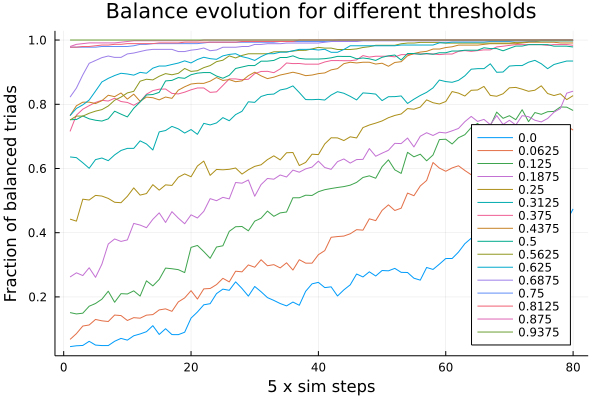

In [9]:
#balanced_mean

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :balanced_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("Fraction of balanced triads")
title!("Balance evolution for different thresholds")

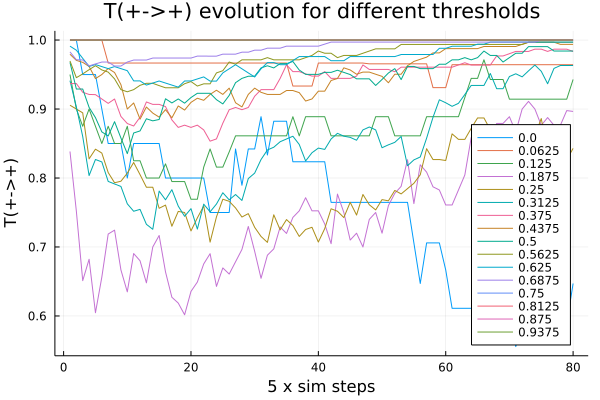

In [10]:
#bal2bal_mean, time evol

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("T(+->+)")
title!("T(+->+) evolution for different thresholds")

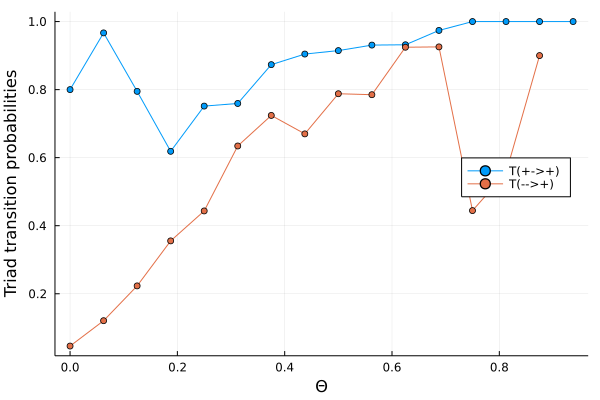

In [11]:
#bal2bal_mean, specific time

time_steps = 90
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
yvals1 = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
plot(xvals, yvals1, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)

yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Triad transition probabilities")
# title!("T(+->+) evolution for different thresholds")

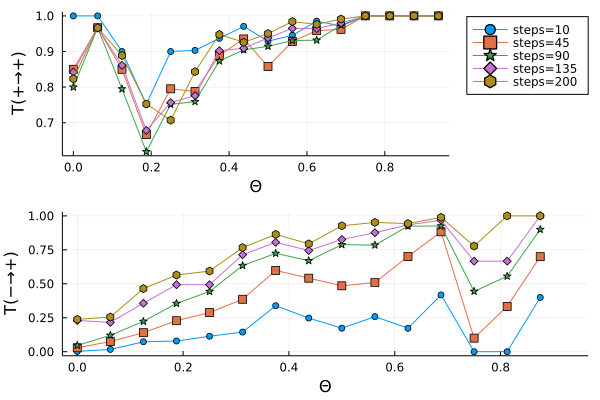

In [12]:
#bal2bal_mean, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("T(+→+)")
p2 = plot(legend = false)
ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)
end
plot(p1, p2, layout = (2,1))
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

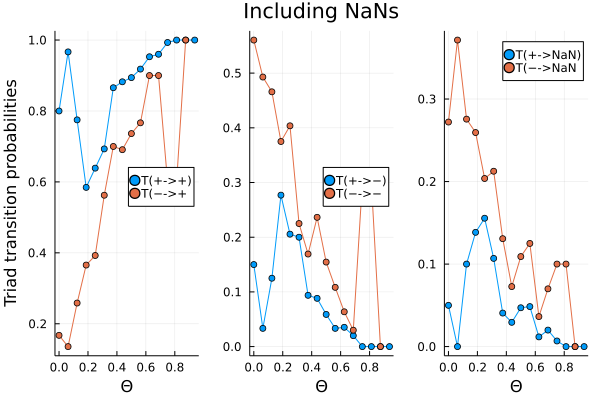

In [13]:
#bal2bal_mean2, specific time

time_steps = 135
time_ind = Int(time_steps / 5)

xvals = cropped_res[:, :threshold]
b2b = [val[time_ind] for val in cropped_res[:, :bal2bal_mean2]]
b2u = [val[time_ind] for val in cropped_res[:, :bal2unbal_mean2]]
b2n = [val[time_ind] for val in cropped_res[:, :bal2not_mean2]]
u2b = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean2]]
u2u = [val[time_ind] for val in cropped_res[:, :unbal2unbal_mean2]]
u2n = [val[time_ind] for val in cropped_res[:, :unbal2not_mean2]]

p1 = plot(xvals, b2b, markershape = :circle, label = "T(+->+)", legend = :right)#, linestyle = :none)
plot!(xvals, u2b, markershape = :circle, label = "T(−->+")

p2 = plot(xvals, b2u, markershape = :circle, label = "T(+->−)", legend = :right)#, linestyle = :none)
plot!(xvals, u2u, markershape = :circle, label = "T(−->−")

p3 = plot(xvals, b2n, markershape = :circle, label = "T(+->NaN)", legend = :topright)#, linestyle = :none)
plot!(xvals, u2n, markershape = :circle, label = "T(−->NaN")

ylabel!(p1, "Triad transition probabilities")
title!(p2, "Including NaNs")
plot(p1, p2, p3, layout = (1,3))

# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")

# title!("T(+->+) evolution for different thresholds")

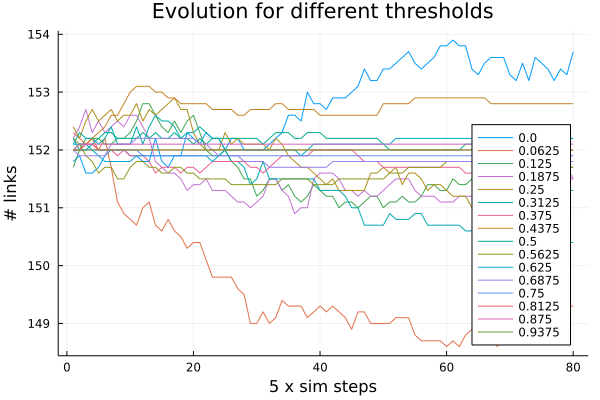

In [14]:
#links_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]

    vals = cropped_res[ind, :links_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# links")
title!("Evolution for different thresholds")

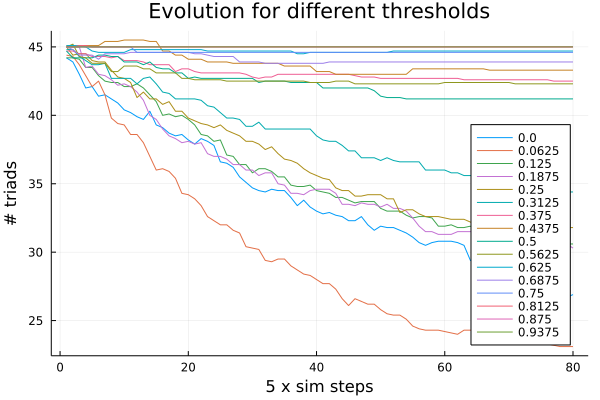

In [15]:
#triads_num

plot(legend = :bottomright)
for th in threshold
    ind = findall(x->x in th, cropped_res[:, :threshold])[1]
    vals = cropped_res[ind, :triads_num]'
    # display(ind)
    plot!(mean(vals, dims=2), label = string(th))
end
plot!()
xlabel!("5 x sim steps")
ylabel!("# triads")
title!("Evolution for different thresholds")

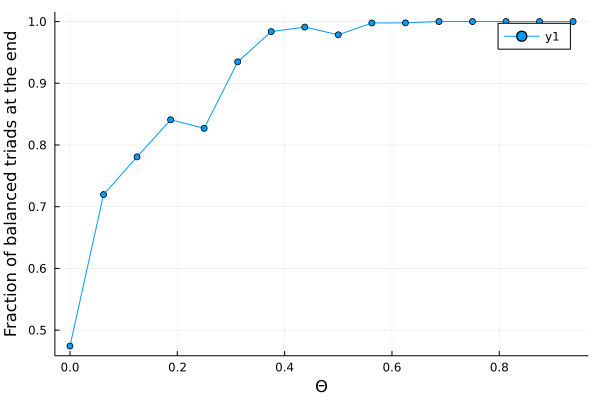

In [16]:
#last_val, specific time

# time_steps = 90
# time_ind = Int(time_steps / 10)

xvals = cropped_res[:, :threshold]
yvals1 = cropped_res[:, :last_val]
plot(xvals, yvals1, markershape = :circle)#, linestyle = :none)

# yvals2 = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

# plot!(xvals, yvals2, markershape = :circle, label = "T(-->+)")#, linestyle = :none)


# plot(legend = :bottomright)
# for th in threshold
#     ind = findall(x->x in th, cropped_res[:, :threshold])[1]
#     plot!(cropped_res[ind, :bal2bal_mean], label = string(th))
# end
# plot!()
xlabel!("Θ")
ylabel!("Fraction of balanced triads at the end")
# title!("T(+->+) evolution for different thresholds")

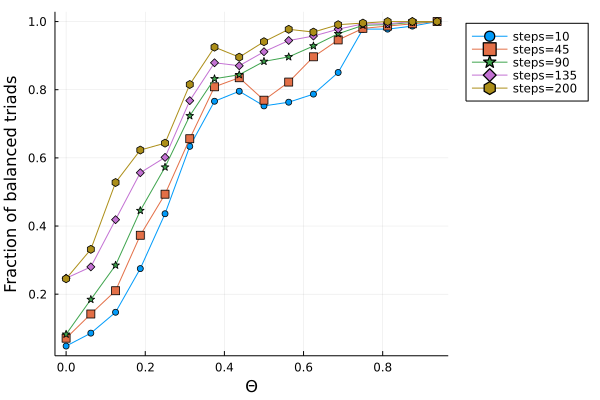

In [17]:
#balanced fraction, different time steps
markers = [:circle, :rect, :star5, :diamond, :hexagon, :xcross, :utriangle, :dtriangle, :rtriangle, :ltriangle, :pentagon, :heptagon, :octagon, :star4, :star6, :star7, :star8, :vline, :hline, :+, :x, :cross]

time_stepss = [10, 45, 90, 135, 200] 
time_inds = Int.(time_stepss / 5)

p1 = plot(legend = :outertopright)
ylabel!("Fraction of balanced triads")
# p2 = plot(legend = false)
# ylabel!("T(−→+)")
for (i, time_ind) in enumerate(time_inds)
    xvals = cropped_res[:, :threshold]
    yvals = [val[time_ind] for val in cropped_res[:, :balanced_mean]]
    plot!(p1, xvals, yvals, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)

    # yvals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]
    # plot!(p2, xvals, yvals, markershape = markers[i], label = "steps="*string(10*time_ind))#, linestyle = :none)
end
# plot(p1, p2, layout = (2,1))
plot(p1)
xlabel!("Θ")
# ylabel!(["T(+->+)" "ff"])

# title!("T(+->+) evolution for different thresholds")

# Finding best simulation parameters

In [18]:
real_trans_df = jldopen(datadir("exp_pro", "real_randomized_triad_trans_results.jld2")) do file
    file["res"]
end
first(real_trans_df, 10)

,threshold,netsense_b2b,netsense_u2b,node_rand_b2b,node_rand_u2b,node_rand_b2b_std
,Float64,Any,Any,Any,Any,Any
1,0.0,0.4,0.0175439,0.2,0.00258333,0.18041
2,0.0625,0.2,0.0769231,0.374167,0.0163158,0.164333
3,0.125,0.631579,0.209302,0.486538,0.0582,0.11894
4,0.1875,0.612903,0.451613,0.560926,0.120694,0.0817351
5,0.25,0.794872,0.391304,0.696765,0.224655,0.0609315
6,0.3125,0.731707,0.619048,0.752222,0.332889,0.0561586
7,0.375,0.837209,0.736842,0.776813,0.406,0.0481336
8,0.4375,0.891304,0.375,0.817742,0.371515,0.0432376
9,0.5,0.869565,0.625,0.816774,0.400303,0.0430357


In [19]:

# dict should be create the following way. df has fields :a, :b, then:
# a = [4] # where 4 is the value which extracted rows should have
# b = [2]
# dict = @dict a b
function get_part_dataframe(df::DataFrame, dict::Dict; verbose = true)
    cropped_res = deepcopy(df)
    for (field, values) in dict
        inds = findall(x->x in values, cropped_res[:, field])
        cropped_res = cropped_res[inds,:]
    end
    if verbose
        display("Extracted " * string(nrow(cropped_res)) * " rows.")
    end
    return cropped_res
end


function calc_error(b2b1, u2b1, b2b2, u2b2; method = "mse")

    b2b_non_nan = (.!(isnan.(b2b1)) .+ .!(isnan.(b2b2)) ) .== 2

    # if sum(b2b_non_nan) < length(b2b1)
    #     return calc_error(b2b1[b2b_non_nan], u2b1, b2b2[b2b_non_nan], u2b2; method = method)
    # end

    u2b_non_nan = (.!(isnan.(u2b1)) .+ .!(isnan.(u2b2)) ) .== 2

    # if sum(u2b_non_nan) < length(b2b1)
    #     return calc_error(b2b1, u2b1[u2b_non_nan], b2b2, u2b2[u2b_non_nan]; method = method)
    # end

    if method == "mse"
        error = sum((b2b1[b2b_non_nan] .- b2b2[b2b_non_nan]).^2) + sum((u2b1[u2b_non_nan] .- u2b2[u2b_non_nan]).^2)
    elseif method == "mae"
        error = sum(abs.(b2b1[b2b_non_nan] .- b2b2[b2b_non_nan])) + sum(abs.(u2b1[u2b_non_nan] .- u2b2[u2b_non_nan]))
    elseif method == "mse_notbeg"
        # b2b_non_nan[1:3] = 0
        return calc_error(b2b1[4:end], u2b1[4:end], b2b2[4:end], u2b2[4:end]; method = "mse")
    elseif method == "mae_notbeg"
        return calc_error(b2b1[4:end], u2b1[4:end], b2b2[4:end], u2b2[4:end]; method = "mae")
    end

    return error
end

calc_error (generic function with 1 method)

In [20]:
fname = datadir("exp_pro", "sim_add_unbalanced_compared_to_rl2.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [22]:
# parameters
pn = unique(res.pn)
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            
            append!(results_df, temp_df)
        end
    end

    # foldername = "exp_pro"

    # fname = datadir(foldername, "sim_add_each_turn_compared_to_rl_sims7.jld2")
    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.0,0.0,0.05,1,9.0,2.87058,5.77008
2,0.01,0.05,0.0,0.0,0.05,1,18.0,1.98305,4.63651
3,0.01,0.05,0.0,0.0,0.05,1,27.0,1.67096,4.51065
4,0.01,0.05,0.0,0.0,0.05,1,36.0,1.81995,4.8539
5,0.01,0.05,0.0,0.0,0.05,1,54.0,2.10422,5.62125
6,0.05,0.05,0.0,0.0,0.05,2,9.0,3.72782,6.27754
7,0.05,0.05,0.0,0.0,0.05,2,18.0,1.96989,4.51261
8,0.05,0.05,0.0,0.0,0.05,2,27.0,1.95047,4.95063
9,0.05,0.05,0.0,0.0,0.05,2,36.0,2.08582,5.28845


"Extracted 16 rows."

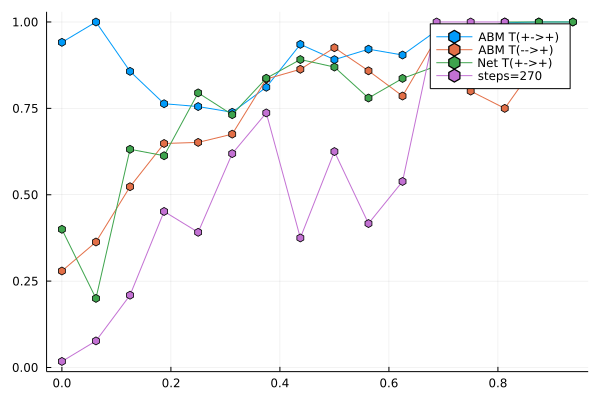

In [23]:
dict = dicts[1]
cropped_res = get_part_dataframe(res, dict)

i = 5
time_ind = Int(time_inds[5])
xvals = cropped_res[:, :threshold]
b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

plot(xvals, b2b_vals, markershape = markers[i], label = "ABM T(+->+)")#, linestyle = :none)
plot!(xvals, u2b_vals, markershape = markers[i], label = "ABM T(-->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[i], label = "Net T(+->+)")#, linestyle = :none)
plot!(real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[i], label = "steps="*string(5*time_ind))#, linestyle = :none)


In [24]:
@assert xvals == real_trans_df.threshold

mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(2.1042169800806896, 5.621249591893397, 0.8714162802428395, 3.192494250443058)

In [25]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 500
 169
   3
 169

"Extracted 16 rows."

"Dict(\"padd\" => 0.13, \"pr_neg\" => 0.05, \"pn\" => 0.0, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.0, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05)"

"Extracted 16 rows."

"Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0)"

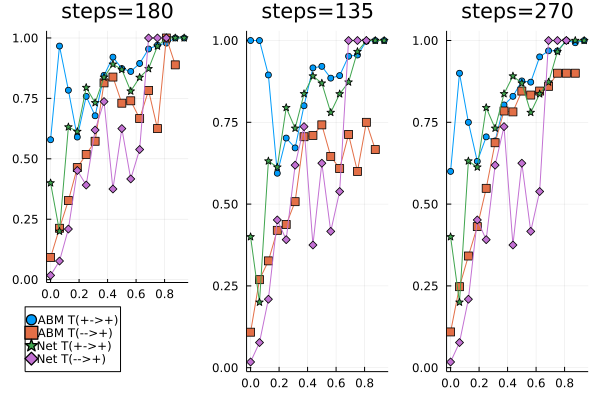

In [26]:
function plot_dict(dicts, df, param_ind)

    dict = dicts[results_df[param_ind, :dict_ind]]
    cropped_res = get_part_dataframe(res, dict)

    time_ind = Int(results_df[param_ind, :time_ind])
    xvals = cropped_res[:, :threshold]
    b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
    u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

    p1 = plot(xvals, b2b_vals, markershape = markers[1], label = "ABM T(+->+)")#, linestyle = :none)
    plot!(p1, xvals, u2b_vals, markershape = markers[2], label = "ABM T(-->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_b2b, markershape = markers[3], label = "Net T(+->+)")#, linestyle = :none)
    plot!(p1, real_trans_df.threshold, real_trans_df.netsense_u2b, markershape = markers[4], label = "Net T(-->+)")#, linestyle = :none)
    title!(p1, "steps="*string(5*time_ind))
    
    return p1
end

p1 = plot_dict(dicts, results_df, 169)
# title!(p1, string(dicts[results_df[665, :dict_ind]]))
display(string(dicts[results_df[169, :dict_ind]]))
p2 = plot_dict(dicts, results_df, 3)
display(string(dicts[results_df[3, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])
p3 = plot_dict(dicts, results_df, 500)
display(string(dicts[results_df[500, :dict_ind]]))
# title!(p1, dicts[results_df[665, :dict_ind]])

plot!(p1, legend = :outertopright)
plot!(p1, legend = :outerbottom)
plot!(p2, legend = false)
plot!(p3, legend = false)

plot(p1, p2, p3, layout = (1,3))

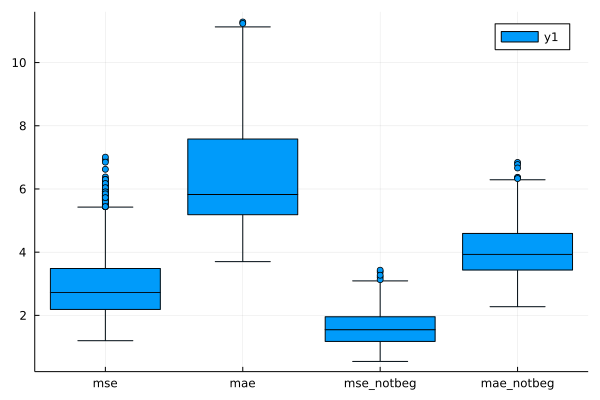

In [27]:
using StatsPlots

L = length(results_df.mse)
xvals = reduce(vcat, [repeat([i],L) for i in 1:4])
fields = [:mse, :mae, :mse_notbeg, :mae_notbeg]
yvals = reduce(vcat, [results_df[:,field] for field in fields])

boxplot(xvals, yvals, xticks = ([1, 2, 3, 4], fields))
# xticks!(["d", "e", "t"])
plot!()

In [28]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


4×10 Matrix{Int64}:
 500  169   520  368  519  544  495  475  525  464
 169  500  1092   38  962  368  363  332  588  337
   3  368    39  653  962  169   38  500  480  478
 169   38     3  962  368  340  369  479  363  465

In [29]:
valinds

4×10 Matrix{Float64}:
 1.19808   1.26232   1.33602   1.3562    …  1.40407   1.42592   1.45248
 3.70052   3.9568    4.04934   4.05092      4.15904   4.18188   4.1831
 0.542751  0.543265  0.548279  0.574993     0.599031  0.610439  0.622563
 2.27509   2.38329   2.44708   2.46759      2.52884   2.53057   2.53842

In [31]:
display(string(dicts[results_df[368, :dict_ind]]))
display(string(results_df[368, :time_ind]*5))

"Dict(\"padd\" => 0.13, \"pr_neg\" => 0.0, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0)"

"135.0"

To summarize. 

Overall, the best results were obtained with the following parameters. 

* Dict(\"padd\" => 0.13, \"pr_neg\" => 0.05, \"pn\" => 0.0, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.05), time = 180

Slightly worse were:

* Dict(\"padd\" => 0.01, \"pr_neg\" => 0.05, \"pn\" => 0.0, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 135
* Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.2, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0), time = 270
* Dict(\"padd\" => 0.17, \"pr_neg\" => 0.05, \"pn\" => 0.2, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.05), time = 270
* Dict(\"padd\" => 0.13, \"pr_neg\" => 0.0, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0), time = 135


## Assuming pn=0.8

In [32]:
fname = datadir("exp_pro", "sim_add_unbalanced_compared_to_rl2_pn0_8.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [33]:
# parameters
pn = [0.8]
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)   
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.8,0.0,0.05,1,9.0,2.48504,5.1353
2,0.01,0.05,0.8,0.0,0.05,1,18.0,1.84105,4.76862
3,0.01,0.05,0.8,0.0,0.05,1,27.0,1.76981,4.82573
4,0.01,0.05,0.8,0.0,0.05,1,36.0,2.05381,5.51885
5,0.01,0.05,0.8,0.0,0.05,1,54.0,2.59626,6.39294
6,0.05,0.05,0.8,0.0,0.05,2,9.0,2.67832,5.37513
7,0.05,0.05,0.8,0.0,0.05,2,18.0,2.28249,4.76667
8,0.05,0.05,0.8,0.0,0.05,2,27.0,1.83322,4.83725
9,0.05,0.05,0.8,0.0,0.05,2,36.0,1.83895,5.27853


In [34]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
 98
 73
 73
 73

In [35]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


4×10 Matrix{Int64}:
 98  73  28  99  88  23  82  13   93  32
 73  92  17  98  87  32  82  22  157  88
 73   3  28  82  78  23  33  98   99   2
 73  17  78  82  92   3  99  69   32  22

In [36]:
valinds

4×10 Matrix{Float64}:
 1.54881  1.61678   1.64524   1.6617    …  1.73098   1.73407   1.74907
 4.31778  4.33567   4.35791   4.37203      4.54602   4.57628   4.60458
 0.69237  0.756028  0.857746  0.859174     0.877421  0.879989  0.89757
 2.70767  2.85267   2.91469   2.93872      3.01362   3.01494   3.02024

In [37]:
function show_res(df::DataFrame, dicts, num)
    display(string(dicts[results_df[num, :dict_ind]]))
    display(string(results_df[num, :time_ind]*5))
end

show_res(results_df, dicts, 73)
show_res(results_df, dicts, 98)
# show_res(results_df, dicts, 143)
# show_res(results_df, dicts, 43)


"Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.8, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0)"

"135.0"

"Dict(\"padd\" => 0.17, \"pr_neg\" => 0.0, \"pn\" => 0.8, \"pclose_triad\" => 0.35, \"pr_pos\" => 0.0)"

"135.0"

## Assuming pn=0.4

In [38]:
fname = datadir("exp_pro", "sim_add_unbalanced_compared_to_rl2_pn0_4.jld2")
if isfile(fname)
    results_df = jldopen(fname) do file
        file["res"]
    end
    display(first(results_df, 3))

    calc_errors = false
else
    calc_errors = true
end

true

In [39]:
# parameters
pn = [0.4]
pclose_triad = unique(res.pclose_triad)
pr_pos = pr_neg = unique(res.pr_pos)
padd = unique(res.padd)
threshold = [0:15...]/16

time_points = [45, 90, 135, 180, 270]
time_inds = Int.(time_points ./ 5)

strdicts = @strdict pn padd pclose_triad pr_pos pr_neg
dicts = dict_list(strdicts)

if calc_errors
    x = dicts[1]
    results_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
    results_df.dict_ind = [0]
    results_df.time_ind = [0.]
    results_df.mse = [0.]
    results_df.mae = [0.]
    results_df.mse_notbeg = [0.]
    results_df.mae_notbeg = [0.]
    delete!(results_df, 1)

    for (dict_ind, dict) in enumerate(dicts)   
        if dict["pr_pos"] != dict["pr_neg"]
            continue
        end
        
        cropped_res = get_part_dataframe(res, dict; verbose =false)
        if nrow(cropped_res) == 0
            display(dict)
        end
        for (i, time_ind) in enumerate(time_inds)
            xvals = cropped_res[:, :threshold]
            b2b_vals = [val[time_ind] for val in cropped_res[:, :bal2bal_mean]]
            u2b_vals = [val[time_ind] for val in cropped_res[:, :unbal2bal_mean]]

            #sorting, just in case
            inds = sortperm(xvals)
            xvals = xvals[inds]
            b2b_vals = b2b_vals[inds]
            u2b_vals = u2b_vals[inds]

            @assert xvals == real_trans_df.threshold

            mse = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
            mae = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
            mse_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
            mae_notbeg = calc_error(b2b_vals, u2b_vals, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

            x = dict
            temp_df = DataFrame(;[Symbol(k)=>v for (k,v) in x]...)
            temp_df.dict_ind = [dict_ind]
            temp_df.time_ind = [time_ind]
            temp_df.mse = [mse]
            temp_df.mae = [mae]
            temp_df.mse_notbeg = [mse_notbeg]
            temp_df.mae_notbeg = [mae_notbeg]
            
            append!(results_df, temp_df)
        end
    end


    jldopen(fname, "w") do file
        file["res"] = results_df
    end;
end

,padd,pr_neg,pn,pclose_triad,pr_pos,dict_ind,time_ind,mse,mae
,Float64,Float64,Float64,Float64,Float64,Int64,Float64,Float64,Float64
1,0.01,0.05,0.4,0.0,0.05,1,9.0,2.58761,5.08833
2,0.01,0.05,0.4,0.0,0.05,1,18.0,1.61628,4.36281
3,0.01,0.05,0.4,0.0,0.05,1,27.0,1.68187,4.5107
4,0.01,0.05,0.4,0.0,0.05,1,36.0,1.59109,4.53398
5,0.01,0.05,0.4,0.0,0.05,1,54.0,2.3041,6.06602
6,0.05,0.05,0.4,0.0,0.05,2,9.0,3.08641,5.55921
7,0.05,0.05,0.4,0.0,0.05,2,18.0,2.43135,4.77954
8,0.05,0.05,0.4,0.0,0.05,2,27.0,2.27978,5.08367
9,0.05,0.05,0.4,0.0,0.05,2,36.0,2.06001,5.32544


In [40]:
cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
inds = zeros(Int, length(cols))
for (i, col) in enumerate(cols)
    inds2 = findall(results_df[:, col] .== minimum(results_df[:, col]))
    if length(inds2) > 1
        display(inds2)
    end
    inds[i] = inds2[1]
end
inds

4-element Vector{Int64}:
  95
 162
  68
 162

In [41]:
#finding 10 best param sets

cols = [:mse, :mae, :mse_notbeg, :mae_notbeg]
mulinds = zeros(Int, length(cols), 10)
valinds = zeros(length(cols), 10)
for (i, col) in enumerate(cols)
    inds2 = partialsortperm(results_df[:, col], 1:10)
    
    mulinds[i,:] = inds2
    valinds[i,:] = results_df[inds2, col]
end
mulinds


4×10 Matrix{Int64}:
  95   68   94  100  162  69   99  85   67  63
 162   68   63   94  100  88   87  69   95  42
  68  103  162   63   94  69  199   4   65  85
 162   68   69   63   85   4   94  88  199   3

In [42]:
valinds

4×10 Matrix{Float64}:
 1.33602   1.3562    1.36775  1.42592   …  1.55844   1.56976   1.57069
 4.05576   4.12398   4.13964  4.18775      4.23166   4.28235   4.33957
 0.543265  0.574993  0.5808   0.642957     0.704649  0.725153  0.726337
 2.46759   2.47497   2.51388  2.53057      2.71001   2.7139    2.72129

In [43]:
function show_res(df::DataFrame, dicts, num)
    display(string(dicts[results_df[num, :dict_ind]]))
    display(string(results_df[num, :time_ind]*5))
end

show_res(results_df, dicts, 68)
show_res(results_df, dicts, 162)
# show_res(results_df, dicts, 33)
# show_res(results_df, dicts, 38)


"Dict(\"padd\" => 0.13, \"pr_neg\" => 0.0, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.0)"

"135.0"

"Dict(\"padd\" => 0.09, \"pr_neg\" => 0.1, \"pn\" => 0.4, \"pclose_triad\" => 0.0, \"pr_pos\" => 0.1)"

"90.0"

# Calculating error for edge and node randomization

In [30]:
real_trans_df

mse = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.node_rand_b2b, real_trans_df.node_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(0.9327230755126914, 3.908759190827624, 0.8146233317693982, 3.1628818989844203)

In [31]:

mse = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse")
mae = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae")
mse_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mse_notbeg")
mae_notbeg = calc_error(real_trans_df.edge_rand_b2b, real_trans_df.edge_rand_u2b, real_trans_df.netsense_b2b, real_trans_df.netsense_u2b; method = "mae_notbeg")

mse, mae, mse_notbeg, mae_notbeg

(1.257523772472556, 4.379225839404921, 1.1650954074853879, 3.798715754039451)

Apart from the error for MSE the results for ABM give better approximation of the transition probabilities. 